# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Danu Ramdhani
- **Email:** danurd.study@gmail.com
- **ID Dicoding:** Danu Ramdhani

## Menentukan Pertanyaan Bisnis

- Berapa persentase perubahan jumlah penyewaan sepeda antara musim panas dan musim dingin selama dua tahun?
- Bagaimana pola penggunaan sepeda pada akhir pekan dibandingkan dengan hari kerja?
- Bagaimana pola temperatur mempengaruhi tingkat penyewaan sepeda di setiap cluster?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
day_df.duplicated().sum()

0

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tipe data kolom dteday adalah object (seharusnya datetime)
- tidak ada missing value pada day_df dataset
- tidak ada duplikat row pada day_df dataset

### Cleaning Data

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- mengubah tipe data pada kolom dteday ke datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [15]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

## Visualization & Explanatory Analysis

### Pertanyaan 1:

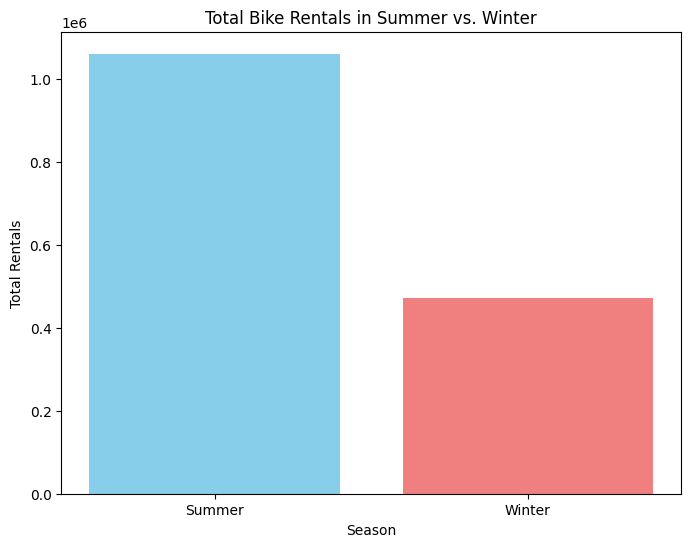

Percentage change in rentals between summer and winter: 125.13%


In [16]:
# Calculate the total rentals for summer and winter
summer_rentals = day_df[day_df['season'] == 3]['cnt'].sum()
winter_rentals = day_df[day_df['season'] == 1]['cnt'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Summer', 'Winter'], [summer_rentals, winter_rentals], color=['skyblue', 'lightcoral'])
plt.title('Total Bike Rentals in Summer vs. Winter')
plt.ylabel('Total Rentals')
plt.xlabel('Season')
plt.show()

# Calculate the percentage change
percentage_change = ((summer_rentals - winter_rentals) / winter_rentals) * 100
print(f"Percentage change in rentals between summer and winter: {percentage_change:.2f}%")

### Pertanyaan 2:

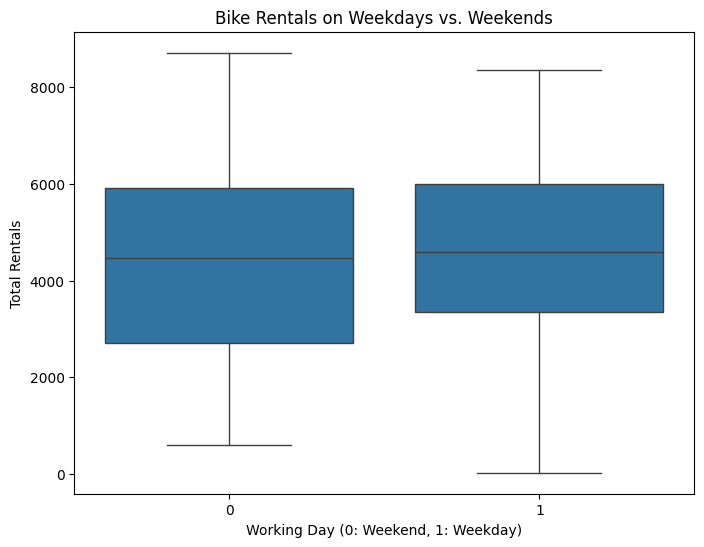

Average bike rentals on weekdays: 4584.82
Average bike rentals on weekends: 4330.17


In [17]:
# Create a boxplot to compare bike rentals on weekdays vs. weekends
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Bike Rentals on Weekdays vs. Weekends')
plt.xlabel('Working Day (0: Weekend, 1: Weekday)')
plt.ylabel('Total Rentals')
plt.show()

# Calculate the average rentals for weekdays and weekends
weekday_avg = day_df[day_df['workingday'] == 1]['cnt'].mean()
weekend_avg = day_df[day_df['workingday'] == 0]['cnt'].mean()

print(f"Average bike rentals on weekdays: {weekday_avg:.2f}")
print(f"Average bike rentals on weekends: {weekend_avg:.2f}")

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [18]:
def manual_clustering(cnt):
  if cnt < 2000:
    return 1
  elif 2000 <= cnt < 4000:
    return 2
  else:
    return 3

day_df['cluster'] = day_df['cnt'].apply(manual_clustering)
day_df['temp'] = (day_df['temp'] * 41) - 8

print(day_df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  6.110847  0.363625  0.805833   0.160446     331         654   
1           2  6.902598  0.353739  0.696087   0.248539     131         670   
2           1  0.050924  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  1.305237  0.229270  0.436957   0.186900      82        1518   

    cnt  cluster  
0   985        1  
1   801        1  
2  1349        1  
3  1562        1

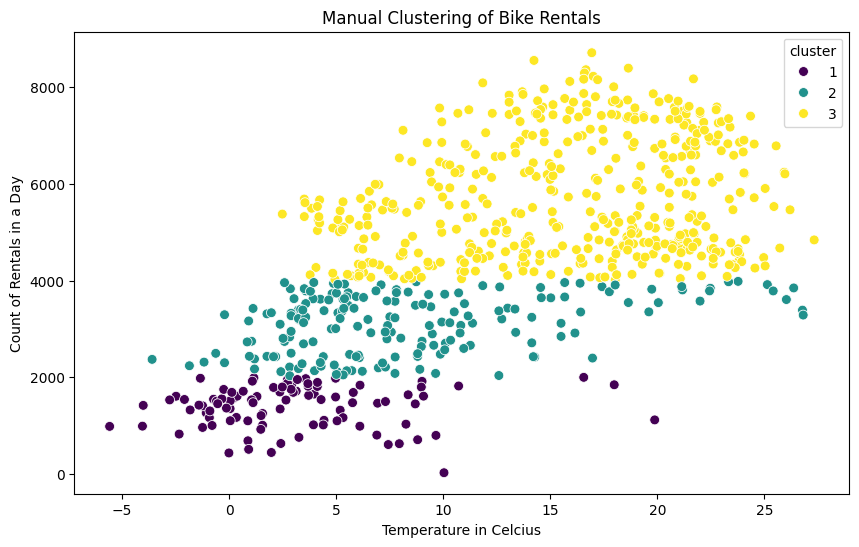

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='cluster', data=day_df, palette="viridis", s=50)
plt.title("Manual Clustering of Bike Rentals")
plt.xlabel("Temperature in Celcius")
plt.ylabel("Count of Rentals in a Day")
plt.show()

## Conclusion

1. **Perbedaan Musim:** Terdapat perbedaan signifikan jumlah penyewaan sepeda antara musim panas dan musim dingin.  Penyewaan sepeda di musim panas jauh lebih tinggi dibandingkan musim dingin, dengan persentase perubahan yang cukup besar. Hal ini menunjukkan pengaruh musim yang kuat terhadap minat masyarakat untuk menyewa sepeda.

2. **Hari Kerja vs. Akhir Pekan:** Pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan. Meskipun perbandingan rata-rata memberikan gambaran umum, boxplot menunjukkan adanya variasi yang lebih besar pada penyewaan sepeda di akhir pekan.  Ini mengindikasikan bahwa faktor lain selain hari kerja/libur juga mempengaruhi penggunaan sepeda.

3. **Pengaruh Temperatur:**  Analisis *manual clustering* berdasarkan jumlah penyewaan dan temperatur menunjukkan adanya pola hubungan antara temperatur dan jumlah penyewaan.  Semakin tinggi temperatur,  semakin tinggi pula jumlah penyewaan sepeda, khususnya di cluster dengan jumlah penyewaan yang tinggi.